In [107]:
from scipy.fftpack import dst, idst
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants and Parameters
N = 150
L = 1.0
h = L / N
x = -L / 2 + h * np.arange(0, N) + h / 2  # Spatial positions
k = np.arange(1, N + 1) * np.pi / L

# Adjusting frequency for "middle C"
harmonics = [1, 9/8, 5/4, 3/2, 5/3, 2]

f1 = (261.63 / 2) * (5/3)
lambda_ = 2 * np.pi * k * f1

dt = 2/np.max(lambda_)
#N_ts = int(0.2*1/dt)
N_ts = int(1/dt)
Samp_rate = 1/dt
print(dt); print(N_ts)
# Define the initial position function (Initial pulse due to strike)
def H_0(x):
    strike_x = 0.1 * L
    return np.where(x < strike_x, x / strike_x, (L - x) / (L - strike_x))

# Initial conditions in spatial domain
A0 = H_0(x)
V0 = np.zeros_like(A0)

# Pickup location for sound recording
Pickup = N // 2

# Solution list
wave_func = []
# Verlet Integration to solve for string displacement over time
S_verlet = np.zeros(N_ts)
An = dst(A0, type=1)
Vn = dst(V0, type=1)
A_prev = An
for n in range(N_ts):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N+1):
        lambda_k =  2 * np.pi**2 * k * f1
        A_n1 = 2 * An[k-1] - A_prev[k-1] - (lambda_k**2) * dt**2 * An[k-1]
        V_n1 = (A_n1 - A_prev[k-1]) / (2 * dt)
        
        An_new[k-1] = A_n1
        Vn_new[k-1] = V_n1

    A_prev = An
    An, Vn = An_new, Vn_new
    Hn = idst(An)
    sol = idst(An, type=1)
    wave_func.append(sol)
    S_verlet[n] = Hn[Pickup]

# Normalize the sound for playback
S_normalized_verlet = S_verlet / np.max(np.abs(S_verlet))

# Play the generated sound
Audio(S_normalized_verlet, rate=Samp_rate)

3.0981518523819984e-06
322773


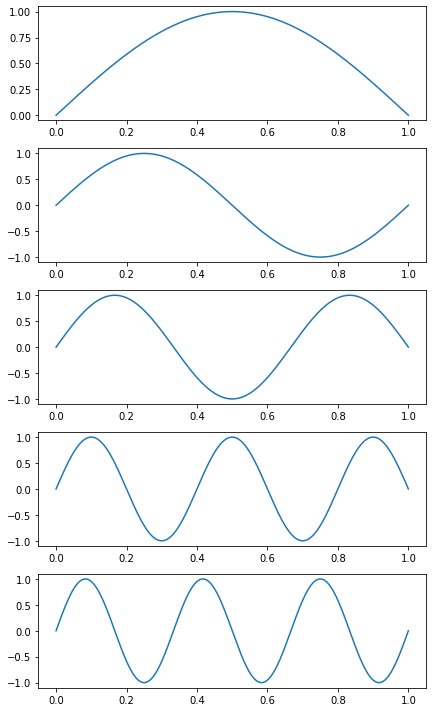

In [101]:

# Parameters for our string
L = 1  # String length
x = np.linspace(0, L, 1000)  # Spatial positions

# Number of harmonics to plot
num_harmonics = 5
harmonics = {
    "C": 261.63*1,
    "D": 261.63*(9/8),
    "E": 261.63*(5/4),
    "G": 261.63*(3/2),
    "A": 261.63*(5/3)
}

# Loop over each harmonic and plot
note = []
for n in range(1, 9):
    y = np.sin(n * np.pi * x / L)  # Harmonic waveform
    note.append(y)
    #ax.plot(x, y, label=f"Harmonic {n}")

fig, axs = plt.subplots(5, 1, figsize=(6, 10))

axs[0].plot(x, note[0])
axs[1].plot(x, note[1])
axs[2].plot(x, note[2])
axs[3].plot(x, note[4])
axs[4].plot(x, note[5])

plt.tight_layout()
plt.show()

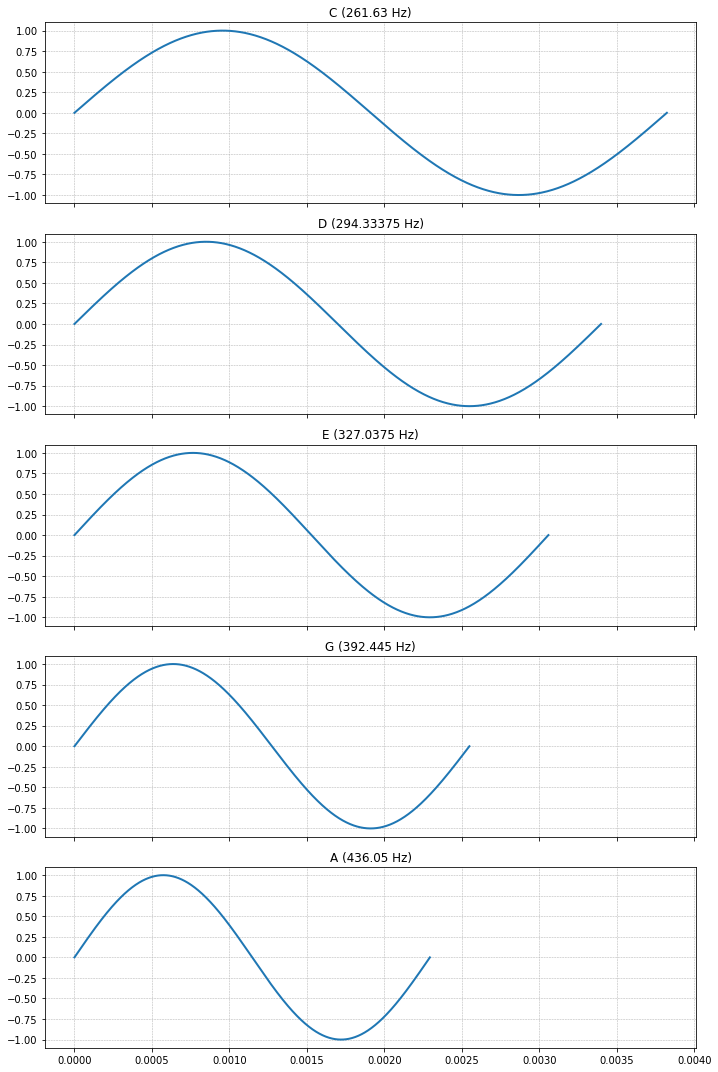

In [106]:
from matplotlib.animation import FuncAnimation
frequencies = {
    "C": 261.63*1,
    "D": 261.63*(9/8),
    "E": 261.63*(5/4),
    "G": 261.63*(3/2),
    "A": 261.63*(5/3)
}
# Initialize figure and axes
fig, axs = plt.subplots(len(frequencies), 1, figsize=(10, 15), sharex=True, sharey=True)

lines = []
# Initial setup for the plots (fundamental frequency for each note)
for ax, (note, freq) in zip(axs, frequencies.items()):
    x = np.linspace(0, 1/freq, 1000)
    y = np.sin(2 * np.pi * freq * x)
    line, = ax.plot(x, y, lw=2)
    lines.append(line)
    ax.set_title(f"{note} ({freq} Hz)")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# The animation function
def update(num):
    for (note, freq), line in zip(frequencies.items(), lines):
        x = np.linspace(0, 1/freq, 1000)
        y = np.sin(2 * np.pi * num * freq * x)
        line.set_ydata(y)
    return lines

# Create the animation
ani = FuncAnimation(fig, update, frames=range(1, num_harmonics + 1), blit=True, repeat=True)

plt.tight_layout()
plt.show()

# # Save the animation as a GIF using the Pillow writer
# file_path = r"C:\Numerical_PDEs/harmonics.gif"
# ani.save(file_path, writer='pillow', fps=1)

# file_path


<ipython-input-105-cc0d6d0a1351>:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


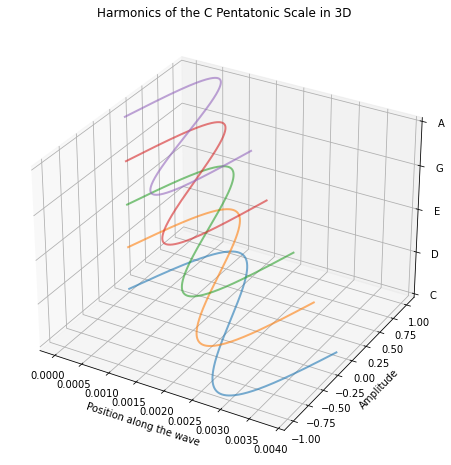

In [105]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the z-ticks for notes
z_ticks = np.arange(len(frequencies))
ax.set_zticks(z_ticks)
ax.set_zticklabels(frequencies.keys())

# Loop through each note and its harmonics and plot in 3D
for z, (note, freq) in enumerate(frequencies.items()):
    x = np.linspace(0, 1/freq, 1000)
    y = np.sin(2 * np.pi * freq * x)
    ax.plot(x, y, z, lw=2, alpha=0.6)

# Set labels and title
ax.set_xlabel('Position along the wave')
ax.set_ylabel('Amplitude')
ax.set_title('Harmonics of the C Pentatonic Scale in 3D')

plt.tight_layout()
plt.show()

c:\Users\Colin\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(
<ipython-input-119-e05aa0bab5bc>:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


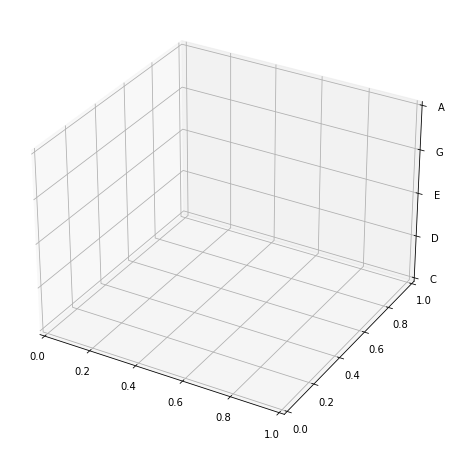

In [119]:
from IPython.display import HTML 
# Set up the 3D figure for animation
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the z-ticks for notes
z_ticks = np.arange(len(frequencies))
ax.set_zticks(z_ticks)
ax.set_zticklabels(frequencies.keys())

# Initialization function for animation
def init():
    ax.clear()
    ax.set_zticks(z_ticks)
    ax.set_zticklabels(frequencies.keys())
    ax.set_xlabel('Position along the wave')
    ax.set_ylabel('Amplitude')
    ax.set_title('Harmonics of the C Pentatonic Scale in 3D')
    return fig,

# Animation function
def animate(i):
    ax.clear()
    ax.set_zticks(z_ticks)
    ax.set_zticklabels(frequencies.keys())
    for z, (note, freq) in enumerate(frequencies.items()):
        x = np.linspace(0, 1/freq, 1000)
        y = np.sin(2 * np.pi * freq * x + i * 0.1)  # Adding a phase shift based on time
        ax.plot(x, y, z, lw=2, alpha=0.6)
    ax.set_xlabel('Position along the wave')
    ax.set_ylabel('Amplitude')
    ax.set_title('Harmonics of the C Pentatonic Scale in 3D')
    return fig,

# Create the 3D animation
ani_3d = FuncAnimation(fig, animate, init_func=init, frames=200, interval=50, blit=False)

plt.tight_layout()
plt.show()


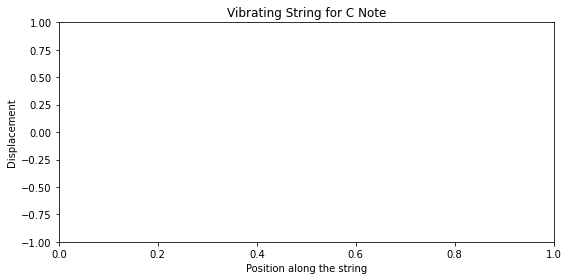

'C:\\Numerical_PDEs/vibrating_string_C_note.gif'

In [117]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

t = np.linspace(0,1,44100, False)
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_title('Vibrating String for C Note')
ax.set_xlabel('Position along the string')
ax.set_ylabel('Displacement')

# Initial empty plot
line, = ax.plot([], [], lw=2)

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    # The displacement of the string at time t can be represented as a sin wave
    # We introduce a time factor to make the wave appear to be moving
    y = np.sin(2 * np.pi * frequencies["C"] * t + i * 0.1) * np.sin(np.pi * t)
    line.set_data(t, y)
    return line,

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=50, blit=True)

plt.tight_layout()
plt.show()

from matplotlib.animation import PillowWriter

# Save the animation as a GIF
gif_filename = r"C:\Numerical_PDEs/vibrating_string_C_note.gif"
ani.save(gif_filename, writer=PillowWriter(fps=20))

# Return the path to the saved GIF
display(gif_filename)


In [113]:
# Generate a richer sound for the C note by adding harmonics

# Define the fundamental frequency and its harmonics
fundamental_frequency = frequencies["C"]
harmonics = [2, 3, 4, 5]  # These are multipliers for the fundamental frequency

# Weights for each harmonic (can be adjusted to create different timbres)
weights = [1.0, 0.5, 0.25, 0.125]

# Generate the waveform with harmonics
rich_c_note = np.sin(2 * np.pi * fundamental_frequency * t)
for i, harmonic in enumerate(harmonics):
    rich_c_note += weights[i] * np.sin(2 * np.pi * harmonic * fundamental_frequency * t)

# Normalize the waveform to avoid clipping
rich_c_note = rich_c_note / np.max(np.abs(rich_c_note))

# Play the richer C note
Audio(rich_c_note, rate=44100)